In [1]:
#Import Libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from fancyimpute import KNN 
from sklearn.metrics import r2_score
from scipy import stats

# %matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
#Set working directory
os.chdir("/content")

In [0]:
#Load data
absent_data = pd.read_excel("Absenteeism_at_work_Project.xls")

### Exploratory Data Analysis

In [4]:
# Check size of Data
absent_data.shape

(740, 21)

In [5]:
#Check Top 5 data
absent_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
#Check Data Type
absent_data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [7]:
#Check Number of Unique values
absent_data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

Here, **Absenteeism time in hours** is our target variable and rest of the data are predictors (continuous and categorial)

In [0]:
# Separating Continuous and Categorical Variables

# Continuous Variables
cont_vars = [
    'Distance from Residence to Work', 
    'Service time', 'Age', 
    'Work load Average/day ', 
    'Transportation expense',
    'Hit target', 
    'Weight', 
    'Height', 
    'Body mass index', 
    'Absenteeism time in hours'
]

# Categorical Variables
cat_vars = [
    'ID',
    'Reason for absence',
    'Month of absence',
    'Day of the week',
    'Seasons',
    'Disciplinary failure', 
    'Education', 
    'Social drinker',
    'Social smoker', 
    'Pet', 
    'Son'
]

### Missing Value Analysis

In [9]:
#Create dataframe with missing values present in each variable
missing_val = pd.DataFrame(absent_data.isnull().sum())

missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [0]:
#Reset Index of missing values
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [11]:
#Calculate missing value percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(absent_data))*100

#Sort missing values in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [0]:
# Save missing values in a csv file
missing_val.to_csv("missing_values.csv", index = False)

### Imputing Missing Values

In [0]:
# Droping observation in which target variable i.e. "Absenteeism time in hours" has missing value
absent_data = absent_data.drop(absent_data[absent_data['Absenteeism time in hours'].isnull()].index, axis=0)

In [0]:
# Checking for "Body mass index" column
# Actual value = 28.0
# Mean = 26.704941860465116
# Median = 25.0
# KNN = 26.821846245893294

In [15]:
#Check data
absent_data['Body mass index'].iloc[60]

28.0

In [16]:
#create missing value
absent_data['Body mass index'].iloc[60] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
absent_data['Body mass index'].iloc[60]

nan

In [18]:
#Impute with mean
absent_data['Body mass index'] = absent_data['Body mass index'].fillna(absent_data['Body mass index'].mean())
absent_data['Body mass index'].iloc[60]

26.704941860465116

In [19]:
#create missing value
absent_data['Body mass index'].iloc[60] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
#Impute with median
absent_data['Body mass index'] = absent_data['Body mass index'].fillna(absent_data['Body mass index'].median())
absent_data['Body mass index'].iloc[60]

25.0

In [21]:
#create missing value
absent_data['Body mass index'].iloc[60] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#Apply KNN imputation algorithm
absent_data = pd.DataFrame(KNN(k = 3).fit_transform(absent_data), columns = absent_data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.095
Imputing row 101/718 with 0 missing, elapsed time: 0.096
Imputing row 201/718 with 0 missing, elapsed time: 0.097
Imputing row 301/718 with 0 missing, elapsed time: 0.098
Imputing row 401/718 with 0 missing, elapsed time: 0.098
Imputing row 501/718 with 1 missing, elapsed time: 0.099
Imputing row 601/718 with 0 missing, elapsed time: 0.099
Imputing row 701/718 with 0 missing, elapsed time: 0.100


In [23]:
absent_data['Body mass index'].iloc[60]

26.821846245893294

In [24]:
#Check if all the missing values are imputed
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Outlier Analysis

In [0]:
# define a function for ploting BoxPlot graph

def create_boxplot(data, cName):
  plt.boxplot(data[cName])
  plt.xlabel(cName)
  plt.title("BoxPlot : " + cName)
  plt.ylabel('Values')
  plt.show()

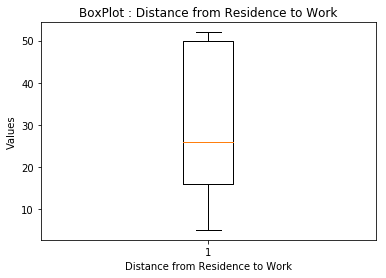

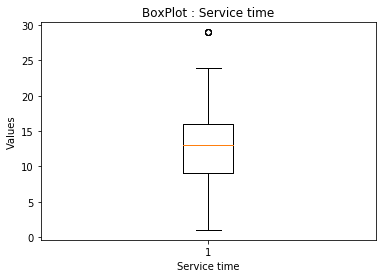

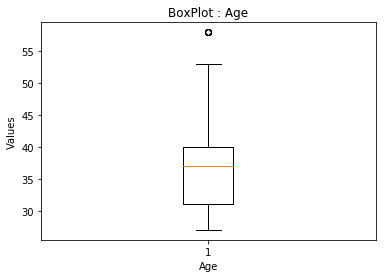

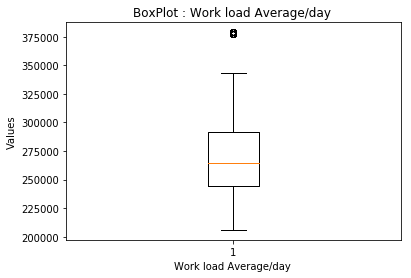

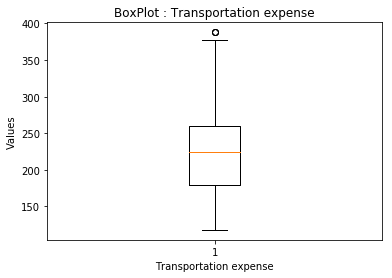

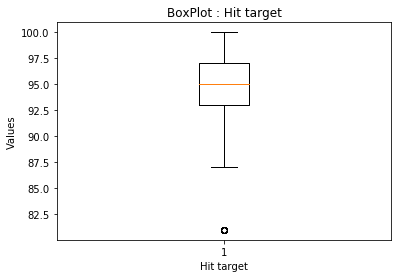

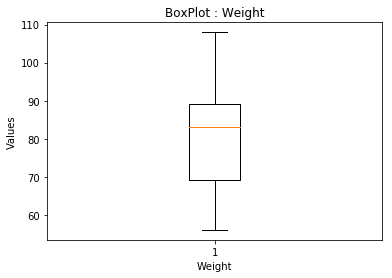

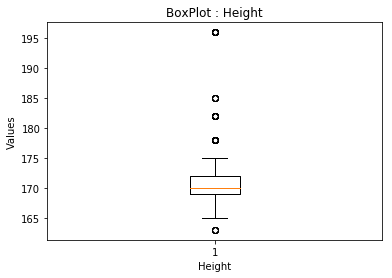

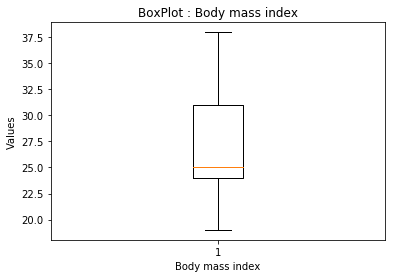

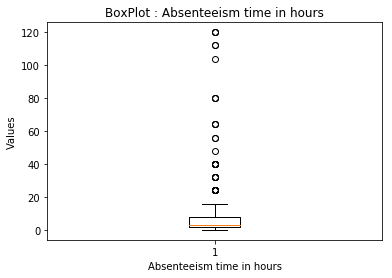

In [26]:
# BloxPlot for all continuous variables
for i in cont_vars:
  create_boxplot(absent_data, str(i))
  print("=" * 77)


The above boxplots show that there are **no outliers** in: 
'Distance from Residence to Work', 
'Weight' *and* 
'Body mass index'

In [0]:
#Storing no outlier variable
no_outliers = ['Distance from Residence to Work', 'Weight', 'Body mass index']

In [28]:
# Remove outliers from all continuous variables
for i in cont_vars:
    if i in no_outliers:
        continue
        
    # Getting 75 and 25 percentile 
    q75, q25 = np.percentile(absent_data[i], [75,25])
    
    #Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper and lower fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    #Replacing all the outliers value with NA
    absent_data.loc[absent_data[i]< min,i] = np.nan
    absent_data.loc[absent_data[i]> max,i] = np.nan
    

# Impute missing values created with KNN
absent_data = pd.DataFrame(KNN(k = 3).fit_transform(absent_data), columns = absent_data.columns)


Imputing row 1/718 with 0 missing, elapsed time: 0.094
Imputing row 101/718 with 0 missing, elapsed time: 0.095
Imputing row 201/718 with 1 missing, elapsed time: 0.096
Imputing row 301/718 with 0 missing, elapsed time: 0.097
Imputing row 401/718 with 0 missing, elapsed time: 0.098
Imputing row 501/718 with 0 missing, elapsed time: 0.099
Imputing row 601/718 with 2 missing, elapsed time: 0.100
Imputing row 701/718 with 0 missing, elapsed time: 0.101


In [29]:
# Cross Checking for missing values
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Feature Selection

#### Correlation plot for continuous variables


[]

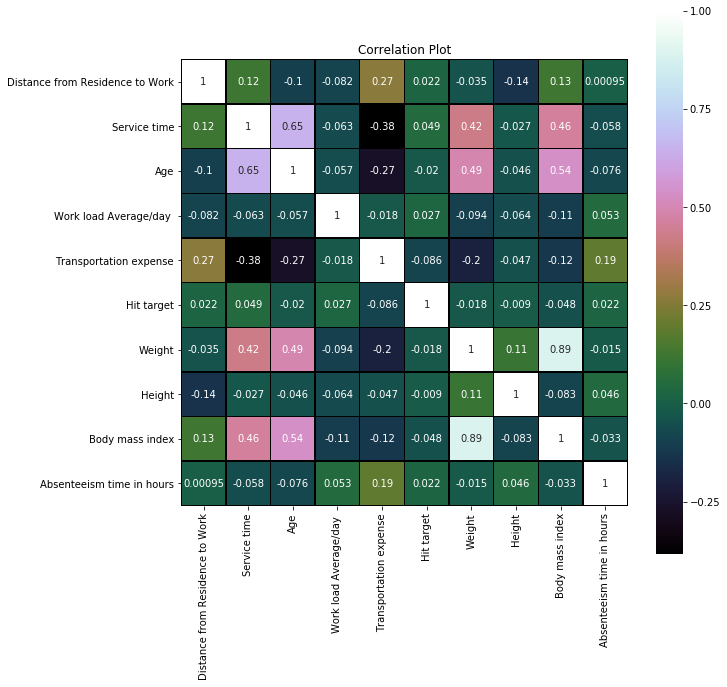

In [30]:
#Correlation plot for continuous variables
absent_data_corr = absent_data[cont_vars]

#Correlation matrix
corr = absent_data_corr.corr()

#Set the width and hieght of the plot
plt.figure(figsize=(10, 10))

#Plot using seaborn library
plt.title('Correlation Plot')
sns.heatmap(corr, linewidths=0.4, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.plot()


#### ANOVA Test for categorical variables


In [31]:
#ANOVA Test for categorical variables
for i in cat_vars:
    f, p = stats.f_oneway(absent_data[i], absent_data["Absenteeism time in hours"])
    print("P value for " + str(i) + " = " + str(p))

P value for ID = 8.762734377787565e-167
P value for Reason for absence = 1.0354352376410707e-276
P value for Month of absence = 3.459399600862653e-25
P value for Day of the week = 0.0008077239229031345
P value for Seasons = 3.0515782325937768e-40
P value for Disciplinary failure = 1.267243302334549e-185
P value for Education = 8.36466800112475e-105
P value for Social drinker = 1.3091608727705665e-150
P value for Social smoker = 9.469186658361471e-184
P value for Pet = 5.348130726125504e-127
P value for Son = 9.463924041308898e-116


In [0]:
# Droping the variables which has redundant information
absent_data = absent_data.drop(['Weight'], axis = 1)

In [33]:
absent_data.shape

(718, 20)

In [0]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
cont_vars.remove('Weight')

In [35]:
cont_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [0]:
# Back up original data
orig_absent_data = absent_data.copy()

In [0]:
orig_absent_data.to_csv('data_2011.csv')

### Feature Scaling

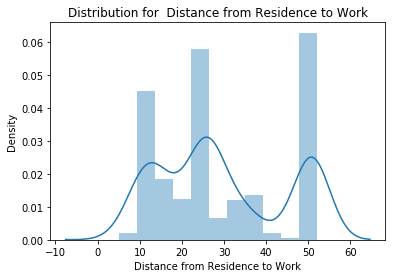

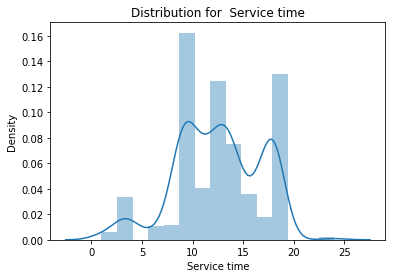

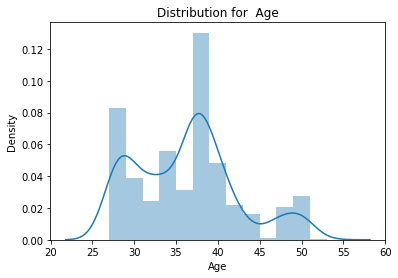

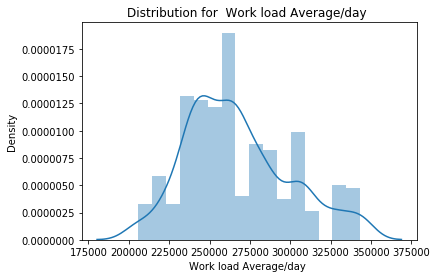

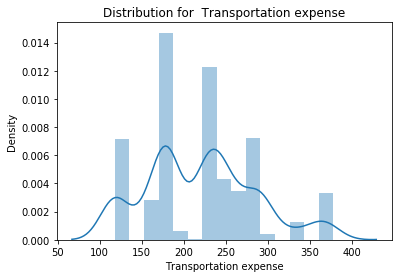

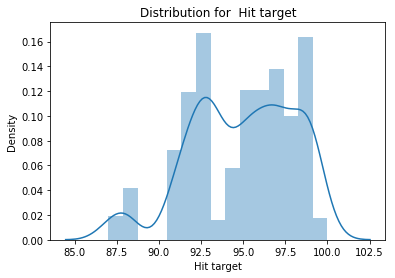

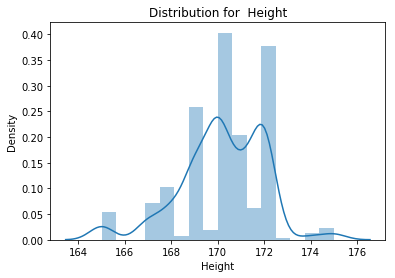

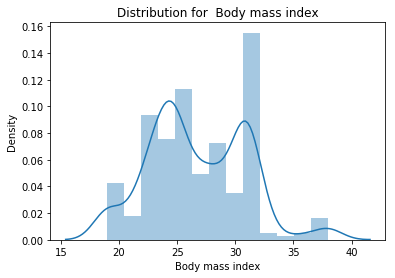

In [38]:
# Checking for normally distributed variable in data
for i in cont_vars:
    if i == 'Absenteeism time in hours':
        continue
        
    sns.distplot(absent_data[i],bins = 'auto')
    plt.title("Distribution for  " + str(i))
    plt.ylabel("Density")
    plt.show()

In [0]:
#Normalization

for i in cont_vars:
    if i == 'Absenteeism time in hours':
        continue
        
    absent_data[i] = (absent_data[i] - absent_data[i].min())/(absent_data[i].max()-absent_data[i].min())

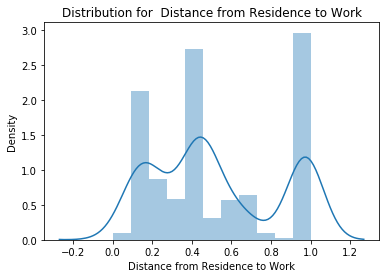

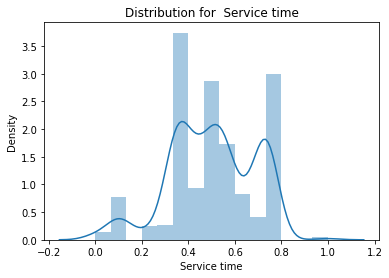

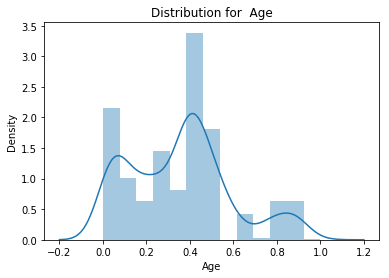

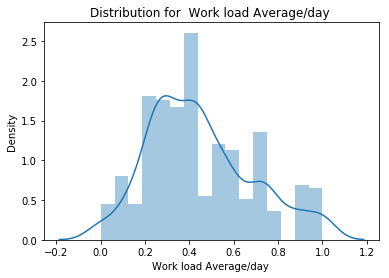

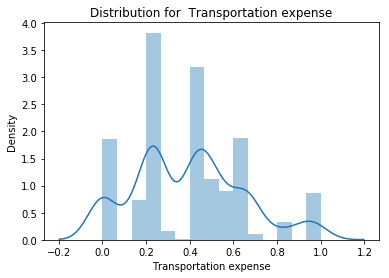

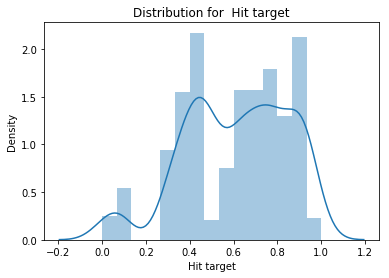

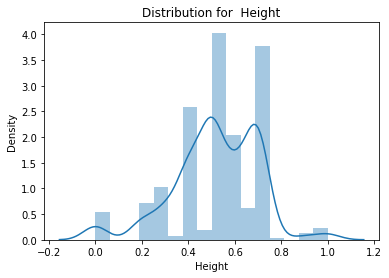

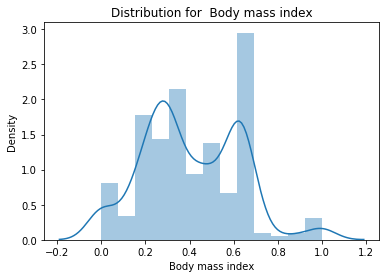

In [40]:
# Checking the distplots of variables after applying normalization.
for i in cont_vars:
    if i == 'Absenteeism time in hours':
        continue
        
    sns.distplot(absent_data[i],bins = 'auto')
    plt.title("Distribution for  " + str(i))
    plt.ylabel("Density")
    plt.show()

In [41]:
# Copying dataframe
df1 = absent_data.copy()

#Checking data
absent_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,4.0
1,36.0,0.0,7.0,3.0,1.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,1.0,0.0,0.0,0.500001,0.631579,0.0
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.631579,2.0
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,1.0,2.0,1.0,1.0,0.0,0.300000,0.263158,4.0
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,2.0


In [0]:
#Creating dummy data for categorical variables
absent_data = pd.get_dummies(data = absent_data, columns = cat_vars)

In [0]:
#Take backup of data
absent_data_copy = absent_data.copy()

In [44]:
absent_data.shape

(718, 129)

#### Dimensionality Reduction using Principal Component Analysis

In [0]:
absent_data = absent_data.reset_index(drop = True)

#spliting the train data 
x_data = absent_data.drop(['Absenteeism time in hours'], axis=1)
y_data = absent_data['Absenteeism time in hours']

In [46]:
x_data.shape

(718, 128)

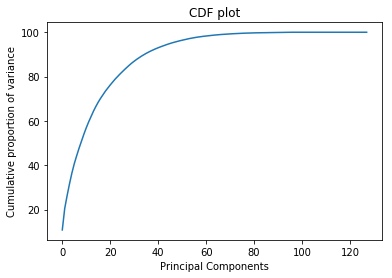

In [47]:
from sklearn.decomposition import PCA

# Converting data to numpy array
#X = x_data.values
X = x_data.copy()

# Data has 128 variables so no of components of PCA:128
pca = PCA(n_components=128)
pca.fit(X)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative proportion of variance')
plt.title('CDF plot')
plt.show()

In [48]:
# We can see that, more than 95% variance is explained by less than 50 variables.


X=x_data.copy()

# From the above plot selecting 95% data variance
pca = PCA(.95)

# Fitting the 95% of selected components to the data
X=pca.fit(X).transform(X)

X=pd.DataFrame(X)

X.shape

# Almost 95% variance is explained by just 47 variables. So, we will reduce the components to 47

(718, 47)

In [0]:
from sklearn.model_selection import train_test_split

#splitting data into test and train
#X denotes independent variables, y denotes dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2)

In [50]:
x_train.shape

(574, 47)

In [51]:
x_test.shape

(144, 47)

### Model Building

In [0]:
# store model performance in a Dataframe
modelsDF = pd.DataFrame(columns=['Model Name', 'RMSE Training', 'RMSE Test', 'R2 Score'])

#### Decision Tree

In [53]:
#Import Decision Tree libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Build model for training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

#Calculate RMSE for training data to check model overfit
pred_train = fit_DT.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(x_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

r2_val = r2_score(y_test,pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_val))


modelsDF.loc[len(modelsDF)] = ["Decision Tree", rmse_train, rmse_test, r2_val]

Root Mean Squared Error For Training data = 3.1116238461833805
Root Mean Squared Error For Test data = 3.092061999876334
R^2 Score(coefficient of determination) = 0.0543892194048371


#### Random forest

In [54]:
#Import Random Forest libraries
from sklearn.ensemble import RandomForestRegressor

#Build model on top of training dataset
fit_RF = RandomForestRegressor(n_estimators = 500).fit(x_train,y_train)

#Calculate RMSE for training data to model overfit
pred_train = fit_RF.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculate RMSE for test data to check accuracy
pred_test = fit_RF.predict(x_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

r2_val = r2_score(y_test,pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_val))


# store results in a Dataframe
modelsDF.loc[len(modelsDF)] = ["Random Forest", rmse_train, rmse_test, r2_val]

Root Mean Squared Error For Training data = 1.1203213595050938
Root Mean Squared Error For Test data = 2.48077353550785
R^2 Score(coefficient of determination) = 0.39131826713622386


#### Linear Regression

In [55]:
# Importing Linear Regression libraries
from sklearn.linear_model import LinearRegression

# Build model on top of training dataset
fit_LR = LinearRegression().fit(x_train , y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_LR.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_LR.predict(x_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

r2_val = r2_score(y_test,pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_val))

# store results in a Dataframe
modelsDF.loc[len(modelsDF)] = ["Linear Regression", rmse_train, rmse_test, r2_val]

Root Mean Squared Error For Training data = 2.568559276805712
Root Mean Squared Error For Test data = 2.4437565584415437
R^2 Score(coefficient of determination) = 0.4093476878676332


#### Gradient Boosting

In [56]:
#Import GradientBoosting library
from sklearn.ensemble import GradientBoostingRegressor

#Build model on top of train dataset
fit_GB = GradientBoostingRegressor().fit(x_train, y_train)

# Calculate RMSE for training data to check model over fitting
pred_train = fit_GB.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(x_test)
rmse_test =np.sqrt(mean_squared_error(y_test,pred_test))

r2_val = r2_score(y_test,pred_test)

print("Root Mean Squared Error For Training data = "+str(rmse_train))
print("Root Mean Squared Error For Test data = "+str(rmse_test))
print("R^2 Score(coefficient of determination) = "+str(r2_val))


# store results in a Dataframe
modelsDF.loc[len(modelsDF)] = ["Gradient Boosting", rmse_train, rmse_test, r2_val]

Root Mean Squared Error For Training data = 1.4019928075751449
Root Mean Squared Error For Test data = 2.6204113745294704
R^2 Score(coefficient of determination) = 0.320866772142691


In [57]:
modelsDF

,Model Name,RMSE Training,RMSE Test,R2 Score
0,Decision Tree,3.111624,3.092062,0.054389
1,Random Forest,1.120321,2.480774,0.391318
2,Linear Regression,2.568559,2.443757,0.409348
3,Gradient Boosting,1.401993,2.620411,0.320867


### Visualization

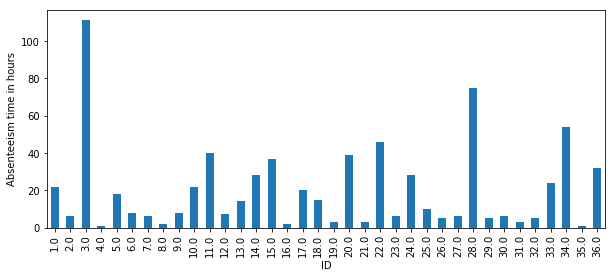

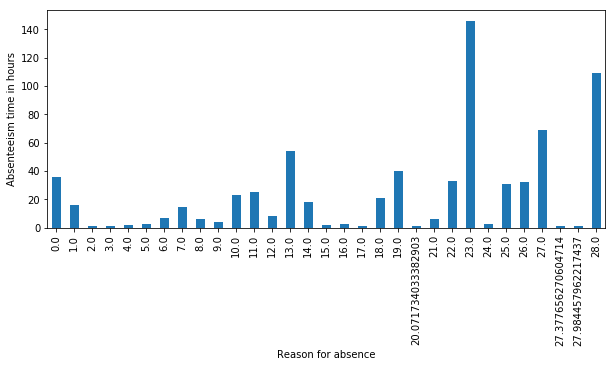

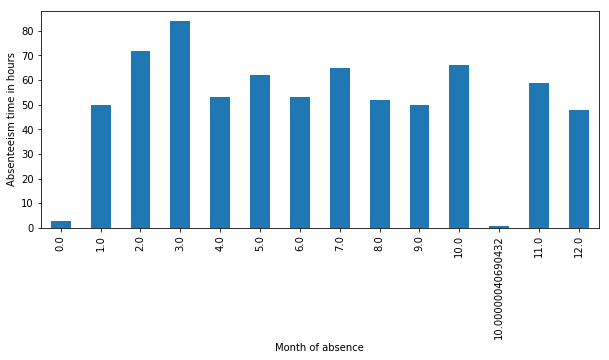

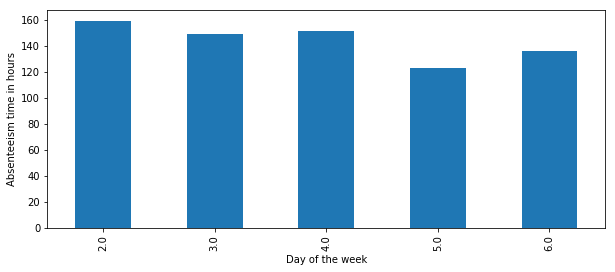

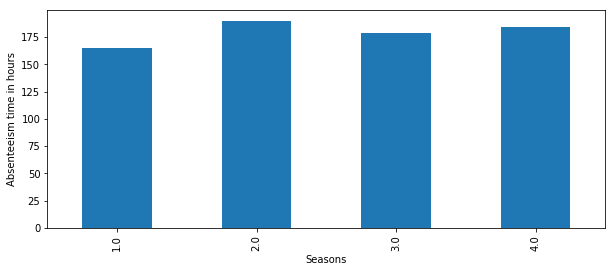

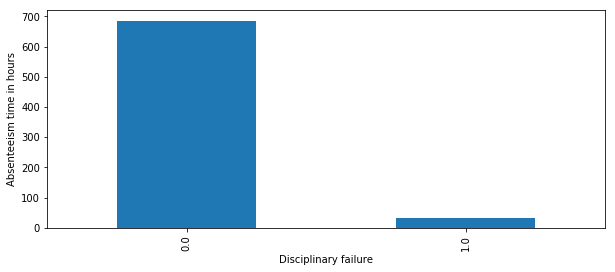

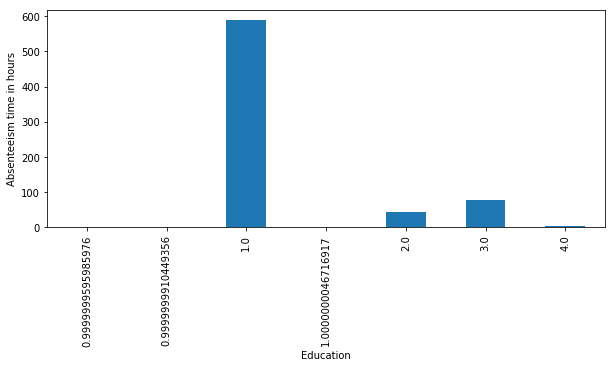

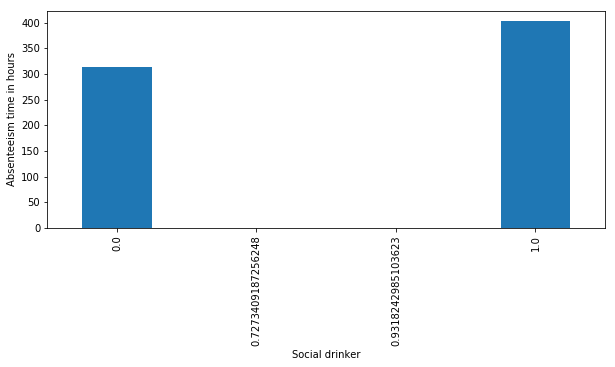

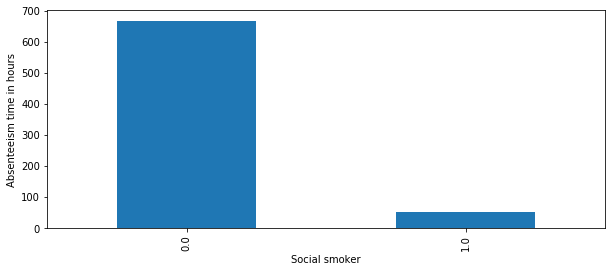

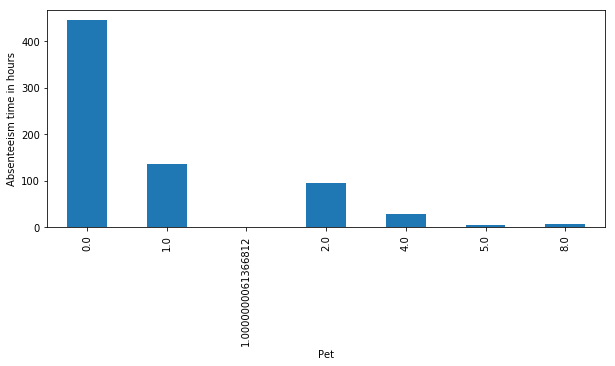

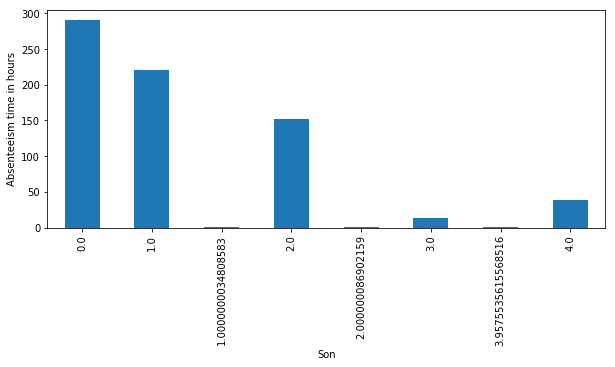

In [58]:
#Let's plot gragh to show relationship between independent categorical variables and Target variable.

for i in cat_vars:
 orig_absent_data.groupby(i)['Absenteeism time in hours'].count().plot(kind='bar',figsize=(10,4))
 plt.ylabel('Absenteeism time in hours')
 plt.show()

**Conclusion:**
Longest hours of Absence for the Reasons 23,28,13,27,19...

23 - medical consultation. 
28 - dental consultation. 
27 - physiotherapy.

From 'Month_of_absent' distribution, we can see that frquency of leaves are more or less uniformally distributed over months, with highest no. of leaves taken in March, Feb and July(holiday season).

From, Absent_Weekday distribution, we can see that frquency of leaves are mostly distributed, with most frequent leaves on 'Monday'.

Displinary failures are very least.

Employee with Education ‘High School’ tend to take more hours of absence.

Employee with 3-4 kids tend to take less hours of absence.

'Social Drinker' takes little more leaves than non drinker.

From, 'Son' and 'Pet', we can see that people having no kids and no pets(no family responsibilities) tend to take frequent leaves.

### TEST DATA PREDICTIONS FOR YEAR 2010--->

Looking at models performance, we can say that 'Random Forest' is the best model based on RMSE value. 

In [59]:
model =  RandomForestRegressor(n_estimators=  500).fit(x_train, y_train)

y_pred = model.predict(x_test)
rmse_pred =np.sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error = " + str(rmse_pred))

Root Mean Squared Error = 2.467138396379706


In [60]:
Absence_prediction=df1.iloc[x_test.index.values,:]
Absence_prediction["Predicted Absent hours"]=y_pred
Absence_prediction.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours,Predicted Absent hours
688,23.0,22.000000,6.0,5.0,3.0,1.000000,0.936170,0.434783,0.346154,0.503670,0.692308,0.0,1.0,2.0,0.0,1.0,4.0,0.900000,0.105263,8.0,7.666552
365,6.0,20.071734,2.0,2.0,2.0,0.273077,0.510638,0.521739,0.230769,0.334224,0.692308,0.0,1.0,2.0,0.0,0.0,2.0,0.200000,0.315789,8.0,7.275367
281,36.0,0.000000,10.0,6.0,4.0,0.000000,0.170213,0.739130,0.884615,0.430331,0.076923,1.0,1.0,1.0,1.0,0.0,0.0,0.685438,0.631579,0.0,1.139070
286,3.0,28.000000,10.0,4.0,4.0,0.234615,0.978723,0.739130,0.423077,0.430331,0.076923,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.631579,1.0,3.912300
265,19.0,0.000000,9.0,3.0,1.0,0.665385,0.957447,0.478261,0.192308,0.642949,0.439884,1.0,1.0,0.0,1.0,0.0,0.0,0.400000,0.210526,0.0,0.362323


In [61]:
#Predicted absence hours of 2010
Absence_prediction['Predicted Absent hours'].sum()

579.82171612712

In [62]:
#Actual absence hours of 2010
Absence_prediction['Absenteeism time in hours'].sum()

541.3275350906434

In [63]:
#Predicted absence hours per month[2010]
Absence_prediction.groupby('Month of absence').sum().reset_index()[[
    'Month of absence','Absenteeism time in hours','Predicted Absent hours']]

,Month of absence,Absenteeism time in hours,Predicted Absent hours
0,1.0,30.000000,41.574492
1,2.0,76.000000,70.475020
2,3.0,68.514555,68.686295
3,4.0,50.577231,40.902008
4,5.0,55.000000,54.666424
5,6.0,55.000000,58.134157
6,7.0,59.000000,63.508143
7,8.0,33.000000,38.396389
8,9.0,26.000000,29.469701
9,10.0,30.000000,39.274922


Random Forest model is our final model to be used for prediction, We'll use this model to predict the losses of 2011. Let's prepare data for 2011.

In [64]:
#data for 2011
#Service and Age will be added by 1

absent_data_2011 = orig_absent_data.copy()
absent_data_2011['Age'] = absent_data_2011['Age'] + 1
absent_data_2011['Service time'] = absent_data_2011['Service time'] + 1
absent_data_2011.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,19.0,51.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,170.000009,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,19.0,39.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.000000,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,15.0,40.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.000000,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.000000,30.0,2.0


In [0]:
absent_data_2011= absent_data_2011.drop(columns = ['Absenteeism time in hours'])

#Normalizing
for i in cont_vars:
    if i == 'Absenteeism time in hours':
        continue   
    absent_data_2011[i] = (absent_data_2011[i] - absent_data_2011[i].min())/(absent_data_2011[i].max()-absent_data_2011[i].min())


# Get dummy variables for categorical variables
emp_2011 = pd.get_dummies(data = absent_data_2011, columns = cat_vars)

#pca
pca = PCA(.95)
emp_2011=pca.fit(emp_2011).transform(emp_2011)

#predicting the 2011 model
predict_2011_absence = model.predict(emp_2011)

In [66]:
#Absent prediction 2011
Predit_2011=absent_data_2011
Predit_2011["Absent hours 2011"]=predict_2011_absence
Predit_2011.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index,Absent hours 2011
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,5.298199
1,36.0,0.0,7.0,3.0,1.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,1.0,1.0,1.0,0.0,0.0,0.500001,0.631579,1.549874
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.631579,2.956833
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.0,1.0,2.0,1.0,1.0,0.0,0.300000,0.263158,4.346205
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.0,1.0,2.0,1.0,0.0,1.0,0.700000,0.578947,3.282287


In [67]:
#Predicted absence hours per month of 2011
monthly_absence= Predit_2011.groupby('Month of absence').sum().reset_index()[['Month of absence','Absent hours 2011']]
monthly_absence=monthly_absence.drop(monthly_absence.index[0])
monthly_absence

,Month of absence,Absent hours 2011
1,1.0,187.630716
2,2.0,274.471697
3,3.0,431.622084
4,4.0,236.429621
5,5.0,264.421122
6,6.0,240.815329
7,7.0,372.586342
8,8.0,243.007661
9,9.0,186.341812
10,10.0,287.753447


#### MONTHLY LOSSES PREDICTED FOR YEAR 2011 PER MONTH

In [68]:
#In a month excluding weekend 22 days are working days.
#there are 36 employee in the xyz company : data["ID"].nunique() i.e.36
#8 hoursof work per day 

Total_Monthly_hours = 22*8*36

# total losses % = (absent_hours / Total_Monthly_hours)*100
monthly_absence['monthly loss percentage'] = (monthly_absence["Absent hours 2011"]/Total_Monthly_hours) * 100

monthly_absence

,Month of absence,Absent hours 2011,monthly loss percentage
1,1.0,187.630716,2.961343
2,2.0,274.471697,4.331940
3,3.0,431.622084,6.812217
4,4.0,236.429621,3.731528
5,5.0,264.421122,4.173313
6,6.0,240.815329,3.800747
7,7.0,372.586342,5.880466
8,8.0,243.007661,3.835348
9,9.0,186.341812,2.941001
10,10.0,287.753447,4.541563


In [0]:
#saving output results
Predit_2011.to_csv("Employee_Absenteeism_2011.csv",index=False)
monthly_absence.to_csv("Monthly_loss.csv",index=False)